In [1]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
from matplotlib.lines import Line2D
pd.options.display.max_columns = None

In [3]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching

In [5]:
EXPERIMENT_NAME = 'game_results/res4'
KPIs = pd.read_csv('ExMAS/extras/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
rm = pd.read_csv('ExMAS/extras/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])

In [12]:
EXPERIMENT_NAME = 'res4'
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']

for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        col_name = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, ALGO)
        rm[col_name] = rm.apply(lambda r: rides.loc[r.ride][col_name], axis = 1)

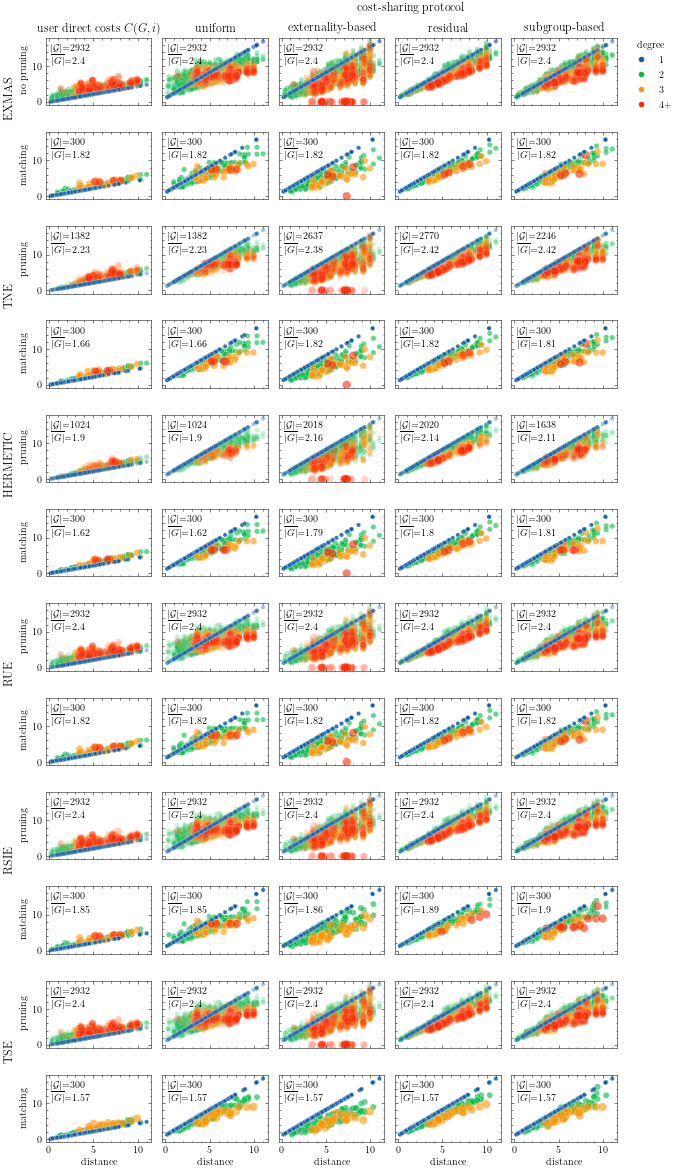

In [77]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
ALGOS = ['EXMAS','TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']
titles = ['user direct costs $C(G,i)$','uniform', 'externality-based','residual','subgroup-based']

fig, axes = plt.subplots(12,len(cols), figsize = (len(cols)*2,1.5*2*6), sharey=True, sharex = True)
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000
df['size'] = 0.7*df['degree']**2 

def single_scatter(col, df, ax, alpha = 0.2, legend = False, text = True):
    pal = sns.color_palette(colors[0:df.deg.nunique()])
    sns.scatterplot(x='distance',y=col, data = df, ax = ax, hue = 'deg', alpha = alpha, palette = pal, size = df['size'])
    sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = ax, alpha = alpha, color = colors[0], size = df['size'])
    if not legend:
        ax.get_legend().remove()
    if text:
        label = "$|\mathcal{G}|$="+ str(df.shape[0]) +"\n$\overline{|G|}$="+ str(round(df.degree.mean(),2))
        ax.text(0.05,0.6,label,rotation=0, fontsize = 10, transform=ax.transAxes)
        

for i,col in enumerate(cols):
        
    axes[0][i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[0][i], hue = 'deg', alpha = 0.2, palette = palette, size = df['size'])
    if col is not 'SUBGROUP':
        sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = axes[0][i], alpha = 0.2, color = 'blue', size = df['size'])    
    
    for j, ALGO in enumerate(ALGOS):
                            
        matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME,'UNIFORM' if col == 'user discomfort' else col,ALGO)
        pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format('UNIFORM' if col == 'user discomfort' else col, ALGO)
        single_scatter(col, df = df[df[pruning_column]==True], ax = axes[2*j][i], legend = False)
        
        single_scatter(col, df = df[df[matching_column]==1], ax = axes[2*j+1][i], alpha = 0.6)
        #axes[2*j][0].set_ylabel('no pruning' if ALGO == 'EXMAS' else ALGO + " pruning")
        #axes[2*j+1][0].set_ylabel('no pruning match' if ALGO == 'EXMAS' else ALGO + " matching")
        if i ==0:
            axes[2*j][0].set_ylabel("pruning")
            axes[2*j+1][0].set_ylabel("matching")
            axes[2*j][0].text(-0.4, -0.2, ALGO,rotation='vertical', transform=axes[2*j][0].transAxes, fontsize = 12)
            
    if i>0:
        axes[0][i].set_ylabel('')
    else:
        axes[0][i].set_ylabel('no pruning')
custom = [Line2D([], [], marker='.', color=colors[i], linestyle='', ms = 9) for i in [0,1,2,3]]

axes[0][4].legend(custom, ['1', '2','3','4+'], loc='upper right',bbox_to_anchor=(1.6, 1.1), title = 'degree')          
        
    #if i<len(cols)-1:
    #    axes[0][i].get_legend().remove()
fig.text(0.5, 0.95,'cost-sharing protocol', fontsize = 12)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.savefig('scatters.png')

In [15]:
# #EXPERIMENT_NAME = 'subs'
# PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
# for i,PRICING in enumerate(PRICINGS):    
#     for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):        
#         col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)        
#         rm['bestpossible_{}_{}'.format(PRICING,ALGO)] = rm.apply(lambda r: rm[(rm.traveller == r.traveller) & (rm[col] == 1)][PRICING].min(), axis=1)


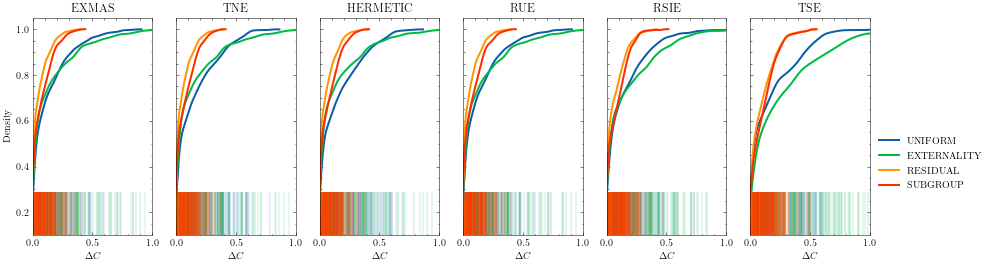

In [75]:
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
fig, axes = plt.subplots(1,6, figsize = (15,4), sharex = True, sharey = True)
j=-1
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        
        to_plot['$\Delta C$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
        to_plot['$\Delta C$'] = to_plot['$\Delta C$'].replace(np.inf,np.nan).fillna(0)
        sns.distplot(to_plot['$\Delta C$'],ax = axes[j], kde = True, hist = False, label = PRICING, rug_kws={"alpha":0.1, 'height':0.2, 'lw':2}, kde_kws={'bw':0.15, 'lw': 2, 'cumulative': True}, rug = True) 
        axes[j].set_xlim((0,1))
        axes[j].set_title(ALGO)
        if j>0:
            axes[j].set_ylabel('')
        #axes[j].set_yscale('log')
        #axes[j].get_legend().remove()
        axes[j].set_ylim((0.1,1.05))
axes[-1].legend(bbox_to_anchor=(1, 0.5))
#plt.savefig('hist.png', dpi = 600)

In [78]:
# PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL']
# fig, axes = plt.subplots(1,3, figsize = (8,2))
# j=-1
# for i,PRICING in enumerate(PRICINGS):
    
#     for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        
#         col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
#         to_plot = rm[rm[col] == 1]
#         to_plot['$\Delta$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
#         sns.distplot(to_plot['$\Delta$'],ax = axes[i], kde = True, hist = False, label = ALGO) 
#         axes[i].set_xlim((0,0.5))
#         axes[i].set_title(PRICING)
#         axes[i].set_ylim((0,5))
# axes[-1].legend(bbox_to_anchor=(1.1, 1.05))
# plt.savefig('hist2.png', dpi = 600)

In [29]:
KPIs['pricing'] = KPIs.apply(lambda x: x.name.split("_")[1].split("-")[1],axis =1)
KPIs['$T_i$'] = KPIs['PassHourTrav']/3600
KPIs['$T_G$'] = KPIs['VehHourTrav']/3600
KPIs['$C$'] = KPIs['cost_user']

In [30]:
def calc_eq13(rm, EXPERIMENT_NAME, ALGO, PRICING, minmax):
    
    matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-{}".format(EXPERIMENT_NAME, PRICING, ALGO, minmax)
    pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING,ALGO)
    if matching_column in rm.columns:
        df = rm[rm[pruning_column]==True]       
        rm[rm[matching_column]==1]
        dominating = 0
        for ride in df.ride.unique():
            if rm[rm.ride == ride][matching_column].iloc[0] == 0:
                this_ride = rm[rm.ride == ride]
                dominates = True
                for traveller in this_ride.traveller:
                    costs_at_match = rm[(rm.traveller == traveller) & (rm[matching_column]==1)].iloc[0][PRICING]
                    this_costs = rm[(rm.traveller == traveller) & (rm.ride == ride)].iloc[0][PRICING]
                    if this_costs >= costs_at_match:
                        dominates = False
                        break
                if dominates:
                    dominating+=1
        #print(EXPERIMENT_NAME, ALGO, PRICING, minmax,dominating, 1 - dominating/df.shape[0])
        return "{}_{}".format(dominating, 1 - dominating/df.shape[0])
    else:
        #print('invalid row')
        return "{}_{}".format(0, 0)

KPIs['EXPERIMENT_NAME'] = KPIs.apply(lambda x: x.name.split('_')[0].split('-')[1] if x.name.startswith('Experiment') else None, axis = 1)
KPIs['ALGO'] = KPIs['algo']
KPIs['PRICING'] = KPIs['pricing']    
KPIs['HS'] = KPIs.apply(lambda x: calc_eq13(rm, x.EXPERIMENT_NAME, x.ALGO, x.PRICING, x.minmax), axis = 1)
KPIs['H'] = KPIs.apply(lambda x: x.HS.split("_")[0], axis = 1)
KPIs['rel_H'] = KPIs.apply(lambda x: x.HS.split("_")[1], axis = 1)                    

res4 EXMAS UNIFORM min 83 0.9716916780354706
res4 EXMAS UNIFORM max 480 0.8362892223738063
res4 TNE UNIFORM min 38 0.9725036179450073
res4 TNE UNIFORM max 454 0.6714905933429811
res4 HERMETIC UNIFORM min 31 0.9697265625
res4 HERMETIC UNIFORM max 332 0.67578125
res4 RUE UNIFORM min 83 0.9716916780354706
res4 RUE UNIFORM max 483 0.8352660300136425
res4 RSIE UNIFORM min 90 0.9693042291950886
res4 RSIE UNIFORM max 463 0.842087312414734
res4 TSE UNIFORM min 0 1.0
res4 TSE UNIFORM max 0 1.0
res4 EXMAS EXTERNALITY min 25 0.9914733969986358
res4 EXMAS EXTERNALITY max 1073 0.6340381991814461
res4 TNE EXTERNALITY min 25 0.9905195297686765
res4 TNE EXTERNALITY max 983 0.627227910504361
res4 HERMETIC EXTERNALITY min 22 0.9890981169474727
res4 HERMETIC EXTERNALITY max 771 0.6179385530227948
res4 RUE EXTERNALITY min 25 0.9914733969986358
res4 RUE EXTERNALITY max 885 0.6981582537517053
res4 RSIE EXTERNALITY min 77 0.9737380627557981
res4 RSIE EXTERNALITY max 989 0.66268758526603
res4 TSE EXTERNALITY 

In [31]:
KPIs['$H$'] = KPIs['rel_H'].astype(float) 

df = KPIs[['pricing','algo','$T_i$','$T_G$', '$C$','$H$','minmax']].set_index(['pricing','algo']).dropna()
mins = df[df.minmax == 'min']
maxs = df[df.minmax == 'max']
df = mins.join(maxs, lsuffix=' stability', rsuffix = ' anarchy')
df = df[['$T_i$ stability','$T_i$ anarchy','$T_G$ stability','$T_G$ anarchy', '$C$ stability', '$C$ anarchy', '$H$ stability', '$H$ anarchy']]
#df.columns = ['pricing' , 'algo','$T_i$ min','$T_i$ max','$T_G$ min','$T_G$ max', '$C$ min', '$C$ max']
print(df.round(2).to_latex())
df.round(2)

\begin{tabular}{llrrrrrrrr}
\toprule
         &     &  \$T\_i\$ stability &  \$T\_i\$ anarchy &  \$T\_G\$ stability &  \$T\_G\$ anarchy &  \$C\$ stability &  \$C\$ anarchy &  \$H\$ stability &  \$H\$ anarchy \\
pricing & algo &                  &                &                  &                &                &              &                &              \\
\midrule
UNIFORM & EXMAS &            48.36 &          46.69 &            33.60 &          44.59 &         677.76 &       654.41 &           0.97 &         0.84 \\
         & TNE &            47.70 &          45.14 &            34.84 &          45.14 &         657.00 &       568.77 &           0.97 &         0.67 \\
         & HERMETIC &            47.59 &          45.14 &            35.07 &          45.14 &         652.90 &       568.77 &           0.97 &         0.68 \\
         & RUE &            48.36 &          48.23 &            33.60 &          41.70 &         677.76 &       711.87 &           0.97 &         0.84 \\
    

$T_i$ stability  $T_i$ anarchy  $T_G$ stability  \
pricing     algo                                                        
UNIFORM     EXMAS               48.36          46.69            33.60   
            TNE                 47.70          45.14            34.84   
            HERMETIC            47.59          45.14            35.07   
            RUE                 48.36          48.23            33.60   
            RSIE                48.61          45.46            33.85   
            TSE                 45.46          45.46            36.11   
EXTERNALITY EXMAS               48.36          46.69            33.60   
            TNE                 48.36          45.14            33.60   
            HERMETIC            48.23          45.14            33.75   
            RUE                 48.36          48.49            33.60   
            RSIE                48.68          45.27            34.54   
            TSE                 45.27          45.27            36.11   
RESIDUAL    EXMAS               48.36          46.69            33.60   
            TNE                 48.36          45.14            33.60   
            HERMETIC            48.25          45.14            33.71   
            RUE                 48.36          48.62            33.60   
            RSIE                48.73          45.27            34.38   
            TSE                 45.27          45.27            36.11   
SUBGROUP    EXMAS               48.36          46.69            33.60   
            TNE                 48.29          45.14            33.69   
            HERMETIC            48.27          45.14            33.71   
            RUE                 48.36          48.44            33.60   
            RSIE                48.73          45.23            34.23   
            TSE                 45.23          45.23            36.11   

                      $T_G$ anarchy  $C$ stability  $C$ anarchy  \
pricing     algo                                                  
UNIFORM     EXMAS             44.59         677.76       654.41   
            TNE               45.14         657.00       568.77   
            HERMETIC          45.14         652.90       568.77   
            RUE               41.70         677.76       711.87   
            RSIE              44.97         680.54       589.34   
            TSE               36.11         643.32       643.32   
EXTERNALITY EXMAS             44.59         677.76       654.41   
            TNE               45.14         677.76       568.77   
            HERMETIC          45.14         673.86       568.77   
            RUE               41.06         677.76       729.65   
            RSIE              45.01         680.72       577.99   
            TSE               36.11         643.32       643.32   
RESIDUAL    EXMAS             44.59         677.76       654.41   
            TNE               45.14         677.76       568.77   
            HERMETIC          45.14         674.11       568.77   
            RUE               40.92         677.76       734.35   
            RSIE              45.01         687.87       577.99   
            TSE               36.11         643.32       643.32   
SUBGROUP    EXMAS             44.59         677.76       654.41   
            TNE               45.14         675.20       568.77   
            HERMETIC          45.14         675.11       568.77   
            RUE               41.22         677.76       725.71   
            RSIE              45.04         687.97       575.20   
            TSE               36.11         643.32       643.32   

                      $H$ stability  $H$ anarchy  
pricing     algo                                  
UNIFORM     EXMAS              0.97         0.84  
            TNE                0.97         0.67  
            HERMETIC           0.97         0.68  
            RUE                0.97         0.84  
            RSIE               0.97         0.84  
            TSE        

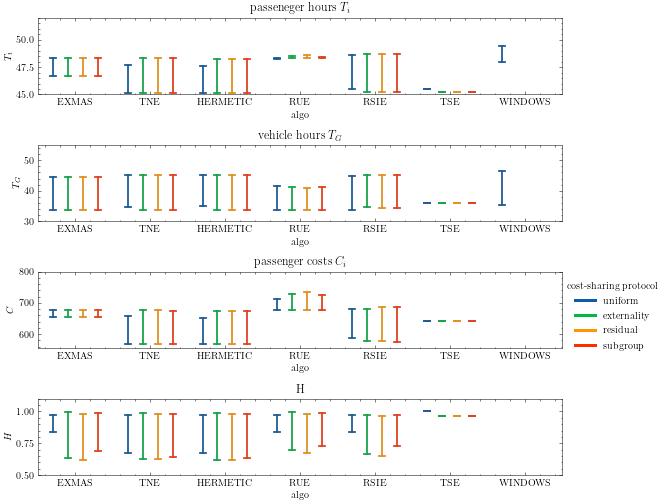

In [100]:
fig, axes = plt.subplots(4,1, figsize = (10,8))
axes = axes.flatten()
titles = ['passeneger hours $T_i$', 'vehicle hours $T_G$', 'passenger costs $C_i$' , 'H']
for i, KPI in enumerate(['$T_i$','$T_G$', '$C$' , '$H$']):
    sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs, alpha = 0, ci = 100, capsize = 0.08, ax = axes[i])
    #sns.stripplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], marker = 'v',ax = axes[i])
    #sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], alpha = 1, ci = 100, capsize = 0.05, ax = axes[i])

    axes[i].get_legend().remove()
    axes[i].set_title(titles[i])
    patches = axes[i].patches
    capsize = .1
    lines_per_err = 1 if capsize is None else 3

    for i, line in enumerate(axes[i].get_lines()):

        newcolor = patches[i // lines_per_err].get_facecolor()
        line.set_color(newcolor)
        line.set_alpha(1)
axes[0].set_ylim((45,52))
axes[1].set_ylim((30,55))
axes[2].set_ylim((555,800))
axes[3].set_ylim((0.5,1.1))
custom = [Line2D([], [], marker='', color=colors[i], linestyle='-', lw = 3) for i in [0,1,2,3]]

axes[2].legend(custom, ['uniform','externality','residual','subgroup'], loc='upper right',bbox_to_anchor=(1.2, 1), title = 'cost-sharing protocol') 



#connector, caplines, (vertical_lines,) = container.errorbar.lines
#vertical_lines.set_color(colors)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
#plt.savefig('bars.png',dpi=600)

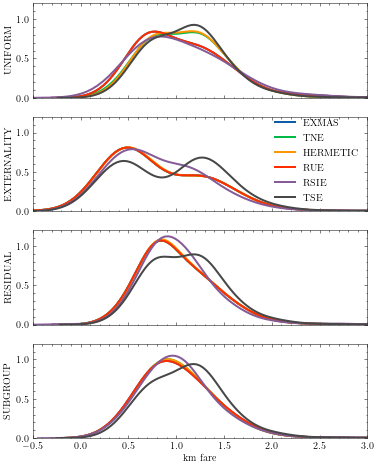

In [52]:
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    rm['fare_{}'.format(PRICING)] = rm[PRICING]-rm.cost_user
    rm['kmfare {}'.format(PRICING)] = rm['fare_{}'.format(PRICING)]/rm.distance   
EXPERIMENT_NAME = 'res4'
plt.style.use(['science'])
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
fig, axes = plt.subplots(4,1, figsize = (6,8), sharey = True, sharex = True)
axes = axes.flatten()
j=-1
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        sns.distplot(to_plot['kmfare {}'.format(PRICING)],ax = axes[i], 
                     kde = True, hist = False, label = ALGO, 
                     rug_kws={"alpha":0.2, 'height':0.1, 'lw':2}, 
                     kde_kws={'bw':0.35, 'lw': 2, 'cumulative': False}, 
                     rug = False) 
        axes[i].set_ylabel(PRICING)  
        axes[i].set_xlabel('km fare')  
        
#         to_plot['$\Delta C$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
#         sns.distplot(to_plot['$\Delta C$'],ax = axes[j], kde = True, hist = False, label = PRICING, rug_kws={"alpha":0.2, 'height':0.2, 'lw':2}, kde_kws={'bw':0.05, 'lw': 2, 'cumulative': True}, rug = True) 
        axes[i].set_xlim((-0.5,3))

        #axes[i].set_xscale('log')
        #axes[i].get_legend().remove()
        axes[i].set_ylim((0,1.2))
axes[1].legend()
#plt.savefig('fares.png', dpi = 600)

In [8]:
EXPERIMENT_NAME = 'game_results/res4'
KPIs = pd.read_csv('ExMAS/extras/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
col = 'indexes'
import json
rides[col] = rides[col].apply(lambda x: json.loads(x))
rm = pd.read_csv('ExMAS/extras/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])

In [236]:
import netwulf as nw

In [237]:
requests = pd.DataFrame(index = rm.traveller.unique())

In [238]:
_, config, _ = nw.load("netwulf_config.json") # load config
_, config_schedule, _ = nw.load("netwulf_config_schedule.json") # load config

(1283, 116)
(715, 116)
(586, 116)


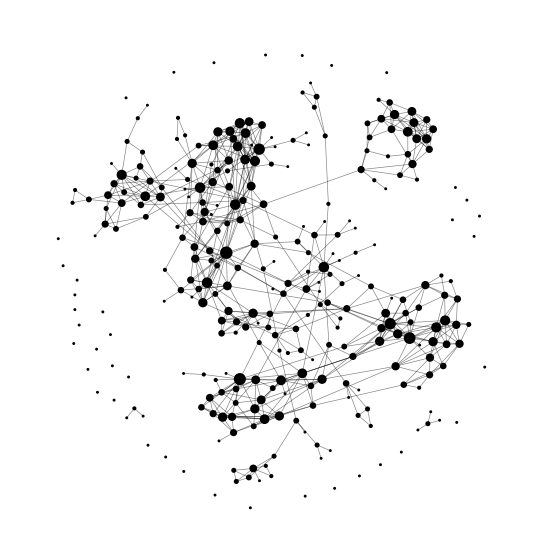

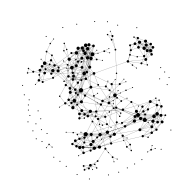

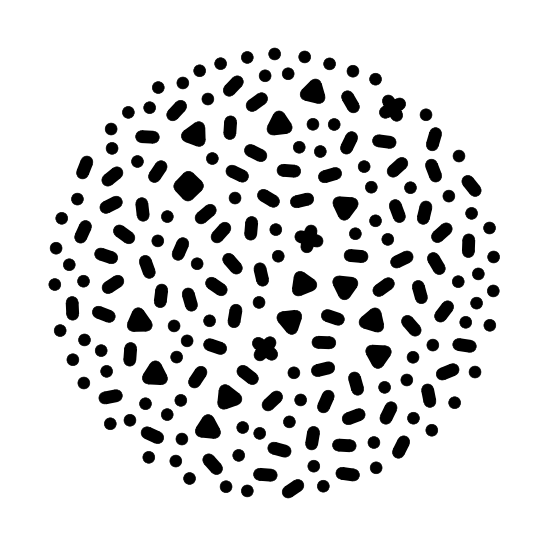

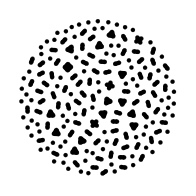

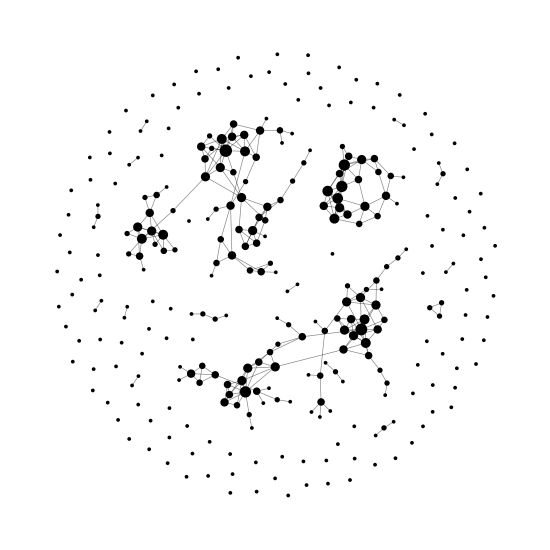

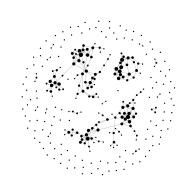

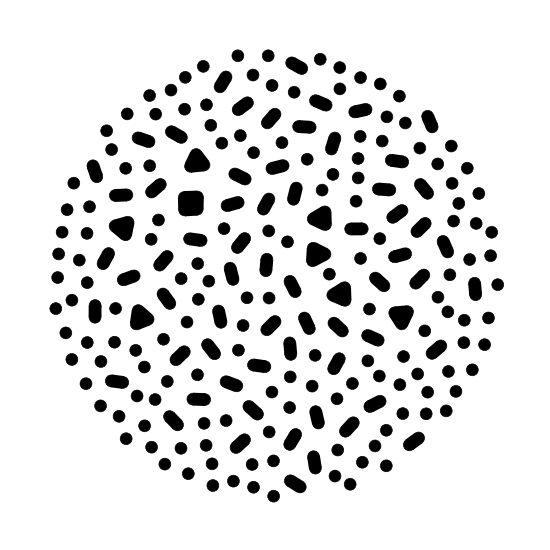

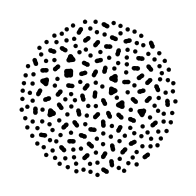

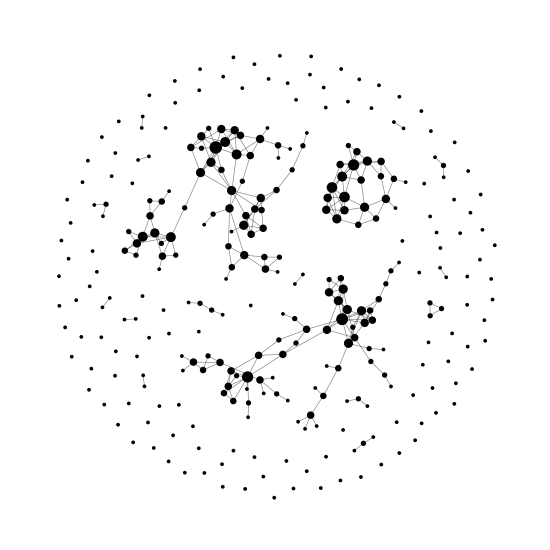

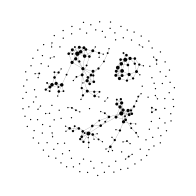

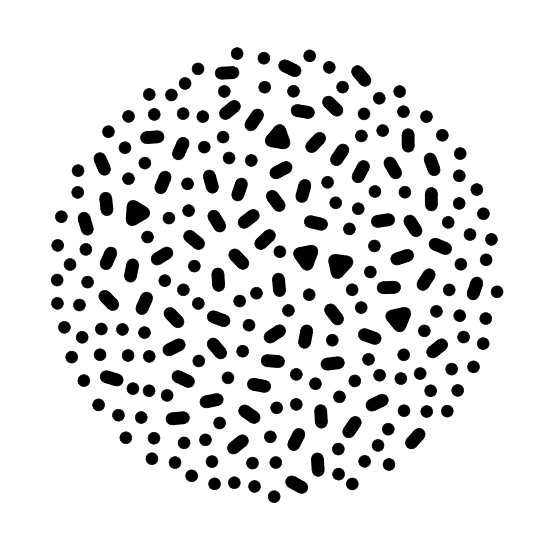

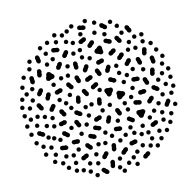

In [241]:
for algo in ['EXMAS', 'TNE', 'HERMETIC']:
    pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format('UNIFORM', algo)
    matching_column = "Experiment-r4_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format('UNIFORM',algo)
    print(rides[rides[pruning_column]==True].shape)
    fig, ax = plt.subplots(figsize = (10,10))
    G = ExMAS.utils.make_shareability_graph(requests, rides[rides[pruning_column]==True])
    f, _ = nw.visualize(G, config = config)
    _, _ = nw.draw_netwulf(f, fig = fig, ax = ax)
    plt.savefig("g_{}_{}.png".format(algo,'pruning'))
    fig, ax = plt.subplots(figsize = (10,10))
    G = ExMAS.utils.make_shareability_graph(requests, rides[rides[matching_column]==1])
    f, _ = nw.visualize(G, config = config_schedule)
    _, _ = nw.draw_netwulf(f, fig = fig, ax = ax)
    plt.savefig("g_{}_{}.png".format(algo,'matching'))

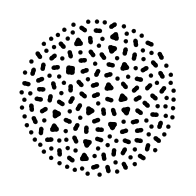

In [240]:
#G = ExMAS.utils.make_shareability_graph(requests, rides[rides[matching_column]==1])
#stylized_network, config_schedule = nw.visualize(G)  # create config
#nw.save("netwulf_config_schedule.json", stylized_network, config_schedule) # save config

In [242]:
os.chdir("/Users/rkucharski/Documents/GitHub/ExMAS")

In [243]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw , ImageOps
size = 196
rows = 2
cols = 3
header = 50
col_names = ['EXMAS', 'TNE', 'HERMETIC']
col_titles = ['-', 'TNE', 'HERMETIC']
#names = ['a) PT travel time','b) Uber travel time', 'c) Time Gap', 'd) Cost Gap', 'e) Uber added value' ]
new_im = Image.new('RGB', (size*cols+3*header,size*rows+2*header), (255,255,255))
row_names = ['pruning', 'matching']
font = ImageFont.truetype("Avenir.ttc", 15)
draw = ImageDraw.Draw(new_im) 
for i in range(0,size*cols,size): # kolumny
    shift = 10

    draw.text((int(header)+i+10+50, 20),col_titles[int(i/size)],(0,0,0),font=font)
    for j in range(0,size*rows,size): # wiersze
        
        PATH = 'g_{}_{}.png'.format(col_names[int(i/size)],row_names[int(j/size)])
        #'../data/results/figs/{}_{}_{}_{}.png'.format(file_header, level, CITIES[int(j/size)],  FIELDS[int(i/size)])
        print(PATH, j, size)
        im = Image.open(PATH)
        #im.thumbnail((size*0.99,size*0.99))
        if i == 0:
            txt=Image.new('L', (250,50))
            d = ImageDraw.Draw(txt)
            d.text( (0, 0), row_names[int(j/size)],  font=font, fill=255)
            w=txt.rotate(90,  expand=1)
            new_im.paste( ImageOps.colorize(w, (0,0,0), (0,0,0)), (int(header/3),j-100),  w)
        new_im.paste(im, (header+i+int(size/100)+shift,header+j+int(size/100)))
#         im = Image.open('../data/results/figs/scale_1.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (400,3*size+header))
#         im = Image.open('../data/results/figs/scale_2.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+1400,3*size+header))
#         im = Image.open('../data/results/figs/scale_3.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+2150,3*size+header))
new_im.save('grafs.jpg', quality=100)
       

g_EXMAS_pruning.png 0 196
g_EXMAS_matching.png 196 196
g_TNE_pruning.png 0 196
g_TNE_matching.png 196 196
g_HERMETIC_pruning.png 0 196
g_HERMETIC_matching.png 196 196


---
(c) Rafał Kucharski, Delft, 2020